<a href="https://colab.research.google.com/github/azzazhr/Machine_Learning/blob/main/TugasJBPrak4_MLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Azzahra Attaqina**

### **NIM  : 2341720224**

### **Kelas : TI-3B**

**TUGAS PRAKTIKUM JOBSHEET 4**

 **1. TUGAS K-MEANS**

# **Langkah 1 - Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')

folder_path='/content/drive/MyDrive/DATAML_AZZA/Mall_Customers.csv'
dpath=folder_path
df = pd.read_csv(dpath)
df.head()

Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Langkah 2 - Pilih Fitur (Min. 2)**

In [ ]:
# 2. Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Standarisasi / scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Langkah 3 - Membuat Model K-Means Dengan Mempertimbangkan Jumlah K Yang Terbaik**

Menggunakan Elbow Method dan Silhoutte

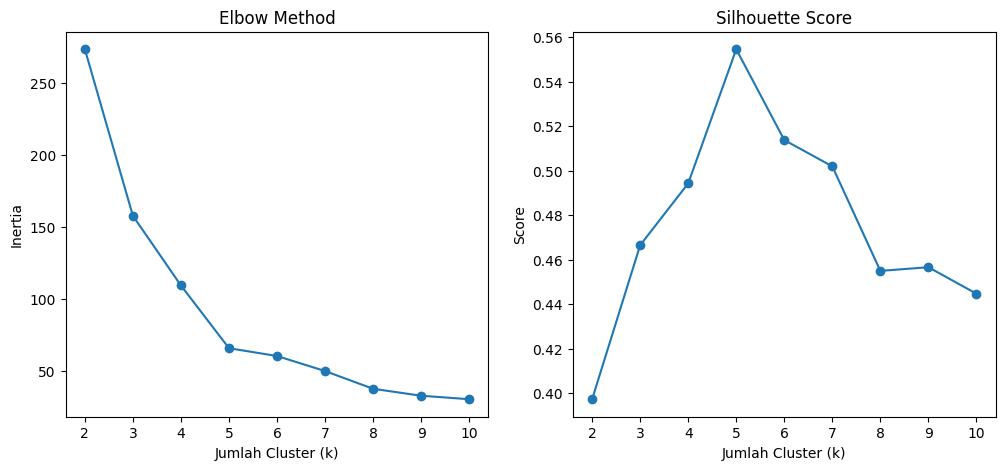

In [ ]:
inertias = []
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Score")
plt.show()

Pilih K terbaik berdasarkan analisis

Jumlah cluster terbaik: 5
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


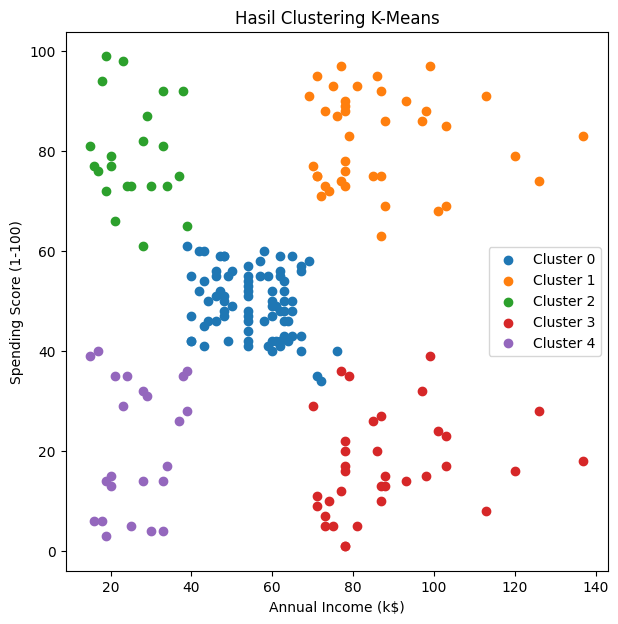

In [ ]:
best_k = sil_scores.index(max(sil_scores)) + 2
print("Jumlah cluster terbaik:", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
print(df.head())

# 6. Visualisasi hasil clustering
plt.figure(figsize=(7,7))
for c in range(best_k):
    plt.scatter(df[df['Cluster']==c]['Annual Income (k$)'],
                df[df['Cluster']==c]['Spending Score (1-100)'],
                label=f'Cluster {c}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()

**2. TUGAS DBSCAN**

# **Langkah 1 - Load Data**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# **Langkah 2 - Membuat Dataset dan Normalisasi**

In [ ]:
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
#normalisasi (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Langkah 3 - jalankan DBSCAN dengan eps=0.2, min_samples=5**

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


# **Langkah 4 - Evaluasi Dengan Metrik**

In [ ]:
# Evaluasi
print("Homogeneity:", homogeneity_score(y_true, labels))
print("Completeness:", completeness_score(y_true, labels))
print("V-measure:", v_measure_score(y_true, labels))
print("ARI:", adjusted_rand_score(y_true, labels))
print("AMI:", adjusted_mutual_info_score(y_true, labels))
if n_clusters >= 2:
    print("Silhouette:", silhouette_score(X_scaled, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


# **Langkah 5 - Visualisasikan Hasil DBSCAN**

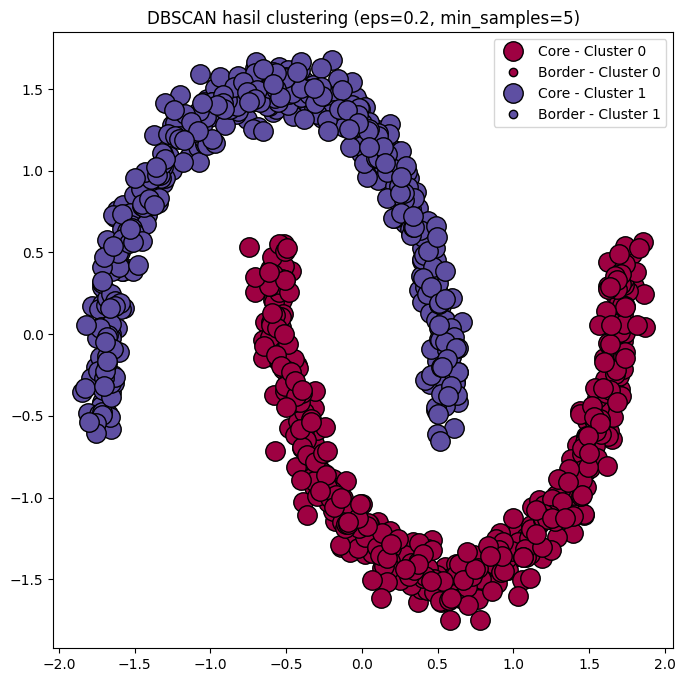

In [ ]:
# Visualisasi hasil
import numpy as np
import matplotlib.pyplot as plt

# Asumsikan Anda sudah menjalankan DBSCAN dan memiliki objek 'db' dan data 'X_scaled'
# db = DBSCAN(eps=0.2, min_samples=5).fit(X_scaled)
labels = db.labels_

# Buat sebuah mask untuk mengidentifikasi core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Siapkan warna untuk visualisasi
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Mulai proses plotting
plt.figure(figsize=(8, 8))

for k, col in zip(unique_labels, colors):
    # Jika labelnya -1, itu adalah noise, warnai hitam
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples (titik besar)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=f'Core - Cluster {k}' if k !=-1 else 'Noise')

    # Plot non-core/border samples (titik kecil)
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Border - Cluster {k}' if k !=-1 else '')

plt.legend()
plt.title(f"DBSCAN hasil clustering (eps=0.2, min_samples=5)")
plt.show()

# **Langkah 6 - Lakukan Eksperimen**

In [ ]:
# Eksperimen eps & min_samples
eps_list = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_list = [3, 5, 10, 20]
results = []

for eps in eps_list:
    for ms in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        try:
            sil = silhouette_score(X_scaled, labels) if n_clusters >= 2 else None
        except:
            sil = None
        results.append([eps, ms, n_clusters, n_noise, sil])

res_df = pd.DataFrame(results, columns=['eps','min_samples','clusters','noise','silhouette'])
print("\nHasil Eksperimen DBSCAN:\n", res_df)


Hasil Eksperimen DBSCAN:
      eps  min_samples  clusters  noise  silhouette
0   0.05            3        69    186    0.112929
1   0.05            5        61    386   -0.048518
2   0.05           10         3    970   -0.294190
3   0.05           20         0   1000         NaN
4   0.10            3         2     14    0.251690
5   0.10            5         3     19    0.290689
6   0.10           10         7     57    0.162306
7   0.10           20         6    850   -0.360195
8   0.20            3         2      0    0.391160
9   0.20            5         2      0    0.391160
10  0.20           10         2      0    0.391160
11  0.20           20         2      3    0.027580
12  0.30            3         2      0    0.391160
13  0.30            5         2      0    0.391160
14  0.30           10         2      0    0.391160
15  0.30           20         2      0    0.391160
16  0.50            3         2      0    0.391160
17  0.50            5         2      0    0.391160
18  

**Hasil EKsperimen**

Dari tabel tersebut, dapat disimpulkan:

- kualitas clustering DBSCAN sangat sensitif terhadap pemilihan parameter eps dan min_samples. Kombinasi parameter terbaik untuk dataset ini adalah eps di antara 0.2 hingga 0.5 dengan min_samples yang tidak terlalu besar (misalnya 3 hingga 10), yang secara konsisten menghasilkan 2 klaster, 0 noise, dan silhouette score tertinggi sekitar 0.391.

Perubahan Klaster, noise, dan kualitas evaluasi :
1. Perubahan Berdasarkan eps (Jarak Jangkauan)
Parameter eps memiliki dampak paling signifikan. Perubahannya secara drastis mengubah hasil clustering.
- Saat eps = 0.05 (Terlalu Kecil):

    - Klaster: Jumlahnya sangat banyak dan tidak stabil (berkisar antara 3 hingga 69). Ini menunjukkan model gagal mengenali struktur data besar dan malah membuat banyak kelompok kecil.

    - Noise: Sangat tinggi, mulai dari 186 hingga 1000 titik. Hampir semua data dianggap noise saat min_samples ditingkatkan.

    - Kualitas Evaluasi: Sangat buruk, dengan silhouette score rendah (0.11) bahkan negatif (-0.04, -0.29), yang menandakan klaster yang salah atau tumpang tindih.


- Saat eps = 0.10 (Mulai Membaik):

    - Klaster: Jumlah klaster turun drastis ke angka yang lebih masuk akal (antara 2 hingga 7).

    - Noise: Jumlah noise berkurang signifikan pada awalnya (14, 19), namun cepat meningkat seiring naiknya min_samples.

    - Kualitas Evaluasi: Silhouette score menjadi positif dan cukup baik (tertinggi 0.29), menandakan kualitas klaster yang jauh lebih baik.

- Saat eps = 0.20 hingga 0.50 (Optimal):

    - Klaster: Hasilnya sangat stabil dan akurat, secara konsisten menghasilkan 2 klaster.

    - Noise: Jumlah noise menjadi minimal (0 atau 3 titik), menandakan hampir semua data berhasil dikelompokkan.

    - Kualitas Evaluasi: Mencapai nilai tertinggi dan paling stabil di sekitar 0.391, yang merupakan indikator kualitas clustering terbaik dalam eksperimen ini.

2. Perubahan Berdasarkan min_samples (Kepadatan)
Parameter min_samples berfungsi sebagai penyaring kepadatan. Pengaruhnya sangat bergantung pada nilai eps yang dipilih.
- Pada eps yang Optimal (0.2 - 0.5):

    - Perubahan min_samples dari 3 hingga 20 tidak banyak mengubah hasil utama. Jumlah klaster tetap 2 dan noise tetap 0.

    - Ini menunjukkan bahwa jika eps sudah tepat, model menjadi lebih tahan banting (robust) terhadap perubahan syarat kepadatan.

    - Satu-satunya anomali kecil terjadi pada eps=0.2 dan min_samples=20, di mana muncul 3 titik noise dan kualitas sedikit menurun.

- Pada eps yang Terlalu Kecil (0.05 - 0.10):

    - Menaikkan min_samples akan memperketat syarat kepadatan. Karena eps sudah kecil, semakin sulit bagi sebuah titik untuk menemukan tetangga yang cukup.

    - Akibatnya, semakin tinggi min_samples, semakin sedikit klaster yang terbentuk dan semakin banyak titik yang dianggap noise. Pada kasus ekstrim (eps=0.05, min_samples=20), tidak ada klaster yang terbentuk sama sekali dan semua data dianggap noise.